In [1]:
from utz import *
from humanize import naturalsize

[Papermill](https://papermill.readthedocs.io/en/latest/) parameters:

In [2]:
name = 'fetch-1'
out_fmt = 'csv'

In [3]:
# Parameters
name = "count-star"


In [4]:
def path(basename):
    return os.path.join(name, basename)

In [5]:
with open(path('query.sql'), 'r') as f:
    query = f.read().rstrip('\n')

In [6]:
makedirs(name, exist_ok=True)
def save(df, df_name, out_fmt=out_fmt):
    if out_fmt == 'csv':
        df.to_csv(path(f'{df_name}.csv'))
    elif out_fmt in [ 'pqt', 'parquet' ]:
        df.to_parquet(path(f'{df_name}.parquet'))
    else:
        raise ValueError(f'Unrecognize out_fmt: {out_fmt}')

In [7]:
har_path = f'{name}.har'
har = read_json(har_path)
har

,log
creator,"{'name': 'WebInspector', 'version': '537.36'}"
entries,"[{'_initiator': {'type': 'script', 'stack': {'..."
pages,[{'startedDateTime': '2024-01-08T01:52:51.175Z...
version,1.2


In [8]:
entries = DF(har.loc['entries', 'log'])
entries

,_initiator,_priority,_resourceType,cache,pageref,request,response,serverIPAddress,startedDateTime,time,timings,connection
0,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_1,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-08T01:53:09.337Z,15.024,"{'blocked': 1.852999976217746, 'dns': -1, 'ssl...",NaN
1,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_1,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-08T01:53:09.337Z,14.617,"{'blocked': 2.152000152528286, 'dns': -1, 'ssl...",NaN
2,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_1,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-08T01:53:09.337Z,22.433,"{'blocked': 3.262000259131193, 'dns': -1, 'ssl...",NaN
3,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_1,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-08T01:53:09.338Z,19.080,"{'blocked': 3.864000085175037, 'dns': -1, 'ssl...",NaN
4,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_1,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-08T01:53:09.338Z,22.489,"{'blocked': 4.308000118851662, 'dns': -1, 'ssl...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
152,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'HEAD', 'url': 'https://duckdb-wasm...","{'status': 403, 'statusText': 'Forbidden', 'ht...",52.217.75.76,2024-01-08T01:53:11.948Z,20.029,"{'blocked': 0.9679999009370801, 'dns': -1, 'ss...",503845
153,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'HEAD', 'url': 'https://duckdb-wasm...","{'status': 403, 'statusText': 'Forbidden', 'ht...",52.217.75.76,2024-01-08T01:53:11.982Z,16.766,"{'blocked': 0.89199998909235, 'dns': -1, 'ssl'...",503938
154,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-wasm-...","{'status': 206, 'statusText': 'Partial Content...",52.217.75.76,2024-01-08T01:53:11.990Z,76.912,"{'blocked': 1.100000287234783, 'dns': -1, 'ssl...",503764
155,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'HEAD', 'url': 'https://duckdb-wasm...","{'status': 403, 'statusText': 'Forbidden', 'ht...",52.217.75.76,2024-01-08T01:53:12.068Z,23.480,"{'blocked': 2.2970000153183943, 'dns': -1, 'ss...",503764


In [9]:
req = pd.json_normalize(entries.request)
res = pd.json_normalize(entries.response)

In [10]:
headers = req.headers.apply(lambda headers: { h['name']: h['value'] for h in headers }).apply(Series)
headers

,:authority,:method,:path,:scheme,accept,accept-encoding,accept-language,cache-control,origin,pragma,referer,sec-ch-ua,sec-ch-ua-mobile,sec-ch-ua-platform,sec-fetch-dest,sec-fetch-mode,sec-fetch-site,user-agent,Referer,User-Agent,Range
0,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:8080,no-cache,http://127.0.0.1:8080/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
1,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:8080,no-cache,http://127.0.0.1:8080/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
2,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:8080,no-cache,http://127.0.0.1:8080/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
3,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:8080,no-cache,http://127.0.0.1:8080/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
4,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:8080,no-cache,http://127.0.0.1:8080/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=335364096-336412671
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN


In [11]:
ranges = headers.Range.dropna()
ranges = ranges.str.extract(r'bytes=(?P<start>\d+)-(?P<last>\d+)?')
starts = ranges.start.astype(int)
ends = ranges['last'].apply(lambda last: nan if isna(last) else int(last) + 1).rename('end')
ranges = sxs(starts, ends)
ranges

,start,end
29,0,NaN
30,0,16384.0
31,16384,81920.0
32,81920,344064.0
35,0,NaN
...,...,...
147,10305536,10567680.0
148,25247744,25509888.0
149,335036416,335101952.0
151,335101952,335364096.0


In [12]:
suffix_range_mask = ~ranges.start.isna() & ranges.end.isna()

In [13]:
e1 = sxs(req.method, req.url, res['content.size'].rename('size'), ranges)
e1

,method,url,size,start,end
0,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
1,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
2,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
3,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
4,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
...,...,...,...,...,...
152,HEAD,https://duckdb-wasm-test.s3.amazonaws.com/2e5-...,0,NaN,NaN
153,HEAD,https://duckdb-wasm-test.s3.amazonaws.com/5e5-...,0,NaN,NaN
154,GET,https://duckdb-wasm-test.s3.amazonaws.com/6e6-...,1048576,335364096.0,336412672.0
155,HEAD,https://duckdb-wasm-test.s3.amazonaws.com/6e6-...,0,NaN,NaN


In [14]:
d1 = e1[e1.url.str.endswith('.duckdb')]
d1

,method,url,size,start,end
28,HEAD,https://duckdb-wasm-test.s3.amazonaws.com/1e5....,0,NaN,NaN
29,HEAD,https://duckdb-wasm-test.s3.amazonaws.com/1e5....,0,0.0,NaN
30,GET,https://duckdb-wasm-test.s3.amazonaws.com/1e5....,16384,0.0,16384.0
31,GET,https://duckdb-wasm-test.s3.amazonaws.com/1e5....,65536,16384.0,81920.0
32,GET,https://duckdb-wasm-test.s3.amazonaws.com/1e5....,262144,81920.0,344064.0
...,...,...,...,...,...
147,GET,https://duckdb-wasm-test.s3.amazonaws.com/2e5-...,262144,10305536.0,10567680.0
148,GET,https://duckdb-wasm-test.s3.amazonaws.com/5e5-...,262144,25247744.0,25509888.0
149,GET,https://duckdb-wasm-test.s3.amazonaws.com/6e6-...,65536,335036416.0,335101952.0
151,GET,https://duckdb-wasm-test.s3.amazonaws.com/6e6-...,262144,335101952.0,335364096.0


In [15]:
d1.method.value_counts()

method
GET     87
HEAD    28
Name: count, dtype: int64

In [16]:
name_idx = d1.url.str.extract(r'.*/(?P<name>(?P<data_idx>\de\d).*)')
indexed = name_idx['name'].str.contains('-idx').rename('indexed')
name_idx = sxs(name_idx, indexed)
names = name_idx['name']
name_idxs = name_idx.drop_duplicates().set_index('name')
nrows = name_idxs.data_idx.apply(lambda s: int(float(s))).rename('nrows')
name_idxs = sxs(name_idxs, nrows).sort_values(['nrows', 'indexed'])
name_idxs

,data_idx,indexed,nrows
name,,,
1e5.duckdb,1e5,False,100000
1e5-idx.duckdb,1e5,True,100000
2e5.duckdb,2e5,False,200000
2e5-idx.duckdb,2e5,True,200000
5e5.duckdb,5e5,False,500000
5e5-idx.duckdb,5e5,True,500000
1e6.duckdb,1e6,False,1000000
1e6-idx.duckdb,1e6,True,1000000
2e6.duckdb,2e6,False,2000000


In [17]:
gets = sxs(d1, names)
gets = gets[gets['size'] > 0]
assert gets.method.unique().tolist() == ['GET']
gets = gets[['name', 'size']]
gets = (
    gets
    .merge(
        ranges,
        how='left',
        left_index=True,
        right_index=True,
    )
    .astype({ 'start': int, 'end': int })
    [[ 'name', 'start', 'end', 'size', ]]
)
gets

,name,start,end,size
30,1e5.duckdb,0,16384,16384
31,1e5.duckdb,16384,81920,65536
32,1e5.duckdb,81920,344064,262144
37,2e5.duckdb,0,16384,16384
40,1e5-idx.duckdb,0,16384,16384
42,2e5-idx.duckdb,0,16384,16384
43,2e5.duckdb,10223616,10240000,16384
44,2e5.duckdb,10240000,10305536,65536
45,1e5-idx.duckdb,5767168,5783552,16384
46,2e5-idx.duckdb,10485760,10502144,16384


In [18]:
assert (gets.start + gets['size'] == gets.end).all()

In [19]:
save(gets, 'gets')

In [20]:
def get_stats(df):
    return dict(
        num=len(df),
        max=max(df),
        min=min(df),
    )
req_stats = gets.groupby('name')['size'].apply(get_stats)
req_stats.index = req_stats.index.set_names('stat', level=1)
req_stats = req_stats.reset_index(level=1).pivot(columns='stat', values='size')
req_stats.columns.name = ''
req_stats

,max,min,num
name,,,
1e5-idx.duckdb,262144,16384,6
1e5.duckdb,262144,16384,3
1e6-idx.duckdb,262144,16384,7
1e6.duckdb,192512,16384,4
2e5-idx.duckdb,262144,16384,7
2e5.duckdb,192512,16384,4
2e6-idx.duckdb,262144,16384,7
2e6.duckdb,262144,16384,7
4e6-idx.duckdb,1048576,16384,8


In [21]:
fetched = gets.groupby('name')['size'].sum().rename('fetched')
fetched_iec = fetched.apply(naturalsize).rename('fetched_iec')
fetched = sxs(fetched, fetched_iec)
fetched = (
    sxs(
        fetched,
        name_idxs,
    )
    .sort_values(['nrows', 'indexed'])
    [fetched.columns]
)
fetched

,fetched,fetched_iec
name,,
1e5.duckdb,344064,344.1 kB
1e5-idx.duckdb,688128,688.1 kB
2e5.duckdb,290816,290.8 kB
2e5-idx.duckdb,704512,704.5 kB
5e5.duckdb,290816,290.8 kB
5e5-idx.duckdb,704512,704.5 kB
1e6.duckdb,290816,290.8 kB
1e6-idx.duckdb,704512,704.5 kB
2e6.duckdb,634880,634.9 kB


In [22]:
import boto3
s3 = boto3.client('s3')

In [23]:
bkt = 'duckdb-wasm-test'
def get_object_size(name):
    res = s3.head_object(Bucket=bkt, Key=name)
    return res['ContentLength']

s3_size = fetched.index.to_series().apply(get_object_size).rename('size')
s3_size_iec = s3_size.apply(naturalsize).rename('size_iec')

In [24]:
stats = sxs(fetched, s3_size, s3_size_iec, name_idxs[['nrows', 'indexed']]).merge(req_stats, how='left', left_index=True, right_index=True, validate='1:1')
stats

,fetched,fetched_iec,size,size_iec,nrows,indexed,max,min,num
name,,,,,,,,,
1e5.duckdb,344064,344.1 kB,5517312,5.5 MB,100000,False,262144,16384,3
1e5-idx.duckdb,688128,688.1 kB,7090176,7.1 MB,100000,True,262144,16384,6
2e5.duckdb,290816,290.8 kB,10498048,10.5 MB,200000,False,192512,16384,4
2e5-idx.duckdb,704512,704.5 kB,12595200,12.6 MB,200000,True,262144,16384,7
5e5.duckdb,290816,290.8 kB,25964544,26.0 MB,500000,False,192512,16384,4
5e5-idx.duckdb,704512,704.5 kB,30158848,30.2 MB,500000,True,262144,16384,7
1e6.duckdb,290816,290.8 kB,51130368,51.1 MB,1000000,False,192512,16384,4
1e6-idx.duckdb,704512,704.5 kB,59518976,59.5 MB,1000000,True,262144,16384,7
2e6.duckdb,634880,634.9 kB,106704896,106.7 MB,2000000,False,262144,16384,7


In [25]:
save(stats, 'stats')

In [26]:
import plotly.express as px
from IPython.display import Image
W = 800
H = W / 2
dims = dict(width=W, height=H)

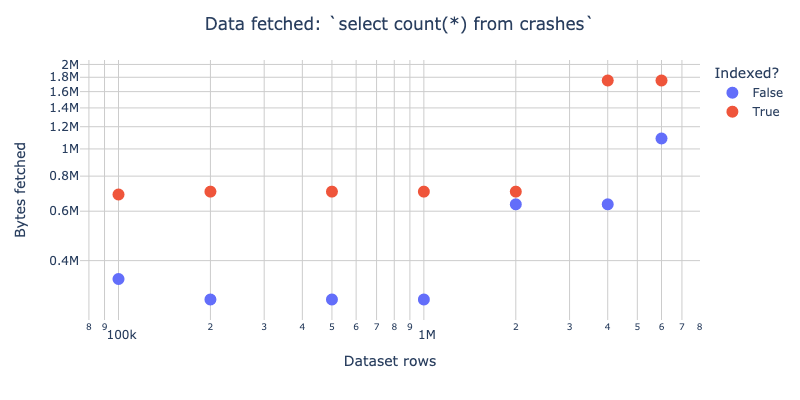

In [27]:
fig = px.scatter(
    stats,
    x='nrows',
    y='fetched',
    log_x=True,
    log_y=True,
    color='indexed',
    labels={
        'fetched': "Bytes fetched",
        'nrows': "Dataset rows",
        'indexed': "Indexed?",
    },
).update_layout(
    title=dict(
        text=f'Data fetched: `{query}`',
        x=0.5,
    ),
    plot_bgcolor='white',
).update_xaxes(
    gridcolor='#ccc',
).update_yaxes(
    gridcolor='#ccc',
).update_traces(marker_size=12)
fig.write_image(path('fetched.png'), **dims)
Image(fig.to_image(**dims))